In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [5]:
def f(x):
    return 3 * x ** 2 - 4 * x + 5

In [ ]:
# Understanding what is a derivative.

In [6]:
f(3.0)

20.0

In [7]:
xs = np.arange(-5,5, 0.25)

In [8]:
ys = f(xs)

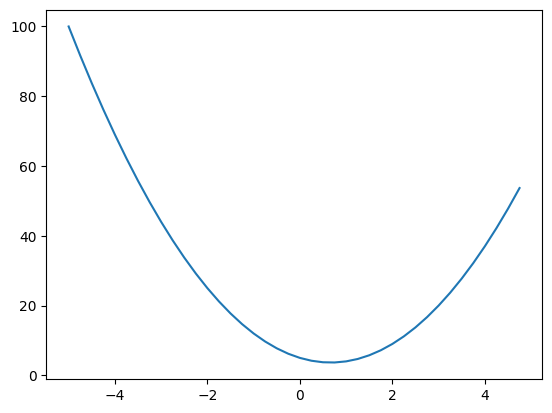

In [10]:
plt.plot(xs,ys)

In [13]:
# Numerical approximation of the slope
h = 0.001
x = 3.0
(f(x + h) - f(x)) / h

14.00300000000243

In [17]:
# Even better numerical approximation
h = 0.00000001
x = 2/3
(f(x + h) - f(x)) / h

0.0

In [18]:
# lets get a little more complex
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [19]:
# derivative wrt a
h = 0.00001

# imputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a* b + c

print((d2 - d1) / h)



-3.000000000064062


In [20]:
# derivative wrt b
h = 0.00001

# imputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a* b + c

print((d2 - d1) / h)



2.0000000000131024


In [21]:
# derivative wrt c
h = 0.00001

# imputs 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a* b + c

print((d2 - d1) / h)



0.9999999999621422


In [25]:
# Basic value class

class Value:

    def __init__(self, data):
        self.data = data;

    def __repr__(self):
        return f"value(data = {self.data})"
# Python i ternally usees the repr function to return this string
a = Value(10.0)
b = Value(-3.0)

a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [26]:
# Medium value class

class Value:

    def __init__(self, data):
        self.data = data;

    def __repr__(self):
        return f"value(data = {self.data})"

    def __add__(self, other):
        # We have to use the special double __ methods to defint these operators for these objects
        out = Value(self.data + other.data)
        return out
        
# Python i ternally usees the repr function to return this string
a = Value(10.0)
b = Value(-3.0)

a + b
# python internally calls a.__add__(b)

value(data = 7.0)

In [27]:
# Medium value class with other arithmetic methods

class Value:
    
    def __init__(self, data):
        self.data = data;

    def __repr__(self):
        # provides a way to print out a nicer looking expression in python 
        return f"value(data = {self.data})"

    def __add__(self, other):
        # We have to use the special double __ methods to defint these operators for these objects
        out = Value(self.data + other.data, )
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

    def __div__(self, other):
        out = Value(self.data / other.data)
        return out

    
        
        
# Python i ternally usees the repr function to return this string
a = Value(10.0)
b = Value(-3.0)
c = Value(4.0)
a * b
# python internally calls a.__mul__(b)

value(data = -30.0)

In [28]:
a + b + c
# (a.__add(b)).__add(c)

value(data = 11.0)

In [29]:
# value class with code to maintian connective tissue

class Value:
    # prefixing an attribute or function name with an underscore 
    # is a naming convention used to indicate internal use eg _children
    def __init__(self, data, _children = ()):
        self.data = data;
        self._prev = set(_children)  #this is empty by default as while creating Value object it has no children

    def __repr__(self):
        # provides a way to print out a nicer looking expression in python 
        return f"value(data = {self.data})"

    def __add__(self, other):
        # We have to use the special double __ methods to defint these operators for these objects
        out = Value(self.data + other.data, (self, other))
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other)) # Notce that we have added the children of the new Value object as self and other
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other))
        return out

    
        
        
# Python i ternally usees the repr function to return this string
a = Value(10.0)
b = Value(-3.0)
c = Value(4.0)
d = a * b 
d._prev
# python internally calls a.__mul__(b)

{value(data = -3.0), value(data = 10.0)}

In [31]:
# value class with code to maintian the opeartor that created these values

class Value:
    # prefixing an attribute or function name with an underscore 
    # is a naming convention used to indicate internal use eg _children
    def __init__(self, data, _children = (), _ops = ''):
        self.data = data;
        self._prev = set(_children)
        self._op = _ops #initially theer  is no operation on the Value object

    def __repr__(self):
        # provides a way to print out a nicer looking expression in python 
        return f"value(data = {self.data})"

    def __add__(self, other):
        # We have to use the special double __ methods to defint these operators for these objects
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-') # Notice that we have added the operation being performed as the third param
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    
        
        
# Python i ternally usees the repr function to return this string
a = Value(10.0)
b = Value(-3.0)
c = Value(4.0)
d = a * b + c          
print(d._prev)
print(d._op)
# Notice that the operator is + and not * reemrber the operator precedendce tree
# Its like (a * b) + c

{value(data = 4.0), value(data = -30.0)}
+


In [34]:
# value class with code to maintian the label of the Value object

class Value:
    # prefixing an attribute or function name with an underscore 
    # is a naming convention used to indicate internal use eg _children
    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self._prev = set(_children)
        self._op = _ops #initially theer  is no operation on the Value object
        self.label = label

    def __repr__(self):
        # provides a way to print out a nicer looking expression in python 
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        # We have to use the special double __ methods to defint these operators for these objects
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-') # Notice that we have added the operation being performed as the third param
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    
        
        
# Python i ternally usees the repr function to return this string
a = Value(10.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(4.0, label = 'c')
d = a * b + c
d.label = 'd'
print(d._prev)
print(d._op)
print(d.label)
# Notice that the operator is + and not * reemrber the operator precedendce tree
# Its like (a * b) + c

{value(data = 4.0, label = c), value(data = -30.0, label = )}
+
d


In [32]:
# Now we hav everything but we need to visualizethe graph
# So some scary code thats not we=ritten by me but copy pasted here from the micrograd repo
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
draw_dot(d) #d = a * b + c

In [37]:
f = Value(-2.0, label = 'f')
L = f * d; L.label = 'L'
L._prev

{value(data = -2.0, label = f), value(data = -26.0, label = d)}

In [ ]:
# Backprop start
# Now we need to store the gradient of the final value wrt the current node for each node
# Thus we midify the value class to store the gradients

In [5]:
# value class with code to maintain the gradient of L wrt to that value

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 # 0 basically menas no effect, that is it does not affect the final value
        #
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    
        
        
# Python i ternally usees the repr function to return this string
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
# Notice that the operator is + and not * remember the operator precedendce tree
# Its like (a * b) + c

In [6]:
# Manual backprop
L.grad = 1.0

d.grad = f.data
f.grad = d.data

e.grad = d.grad * 1.0
c.grad = d.grad * 1.0

a.grad = e.grad * b.data
b.grad = e.grad * a.data


print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)
print(e.grad)
print(f.grad)
print(L.grad)

6.0
-4.0
-2.0
-2.0
-2.0
4.0
1.0


In [ ]:
# dd/dc ? 
# d = c + e

# (f(x + h) - f(x)) / h

# (c+h + e - (c + e))/h

# h / h
# 1.0

# dd/de?
# d = c + e
# h / h
# 1.0

# want:
# dL/dc = dL/ dd * dd/dc

# Know:
# dL/ dd
# dd / dc

# Thus we can conclude that a plus node routes the derivitive

In [48]:
# dL/ de = -2.0

# e = a * b

# dL / da = dL/ de * dL / da
# dL/da = value of b i.e value of opposite node


In [46]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  a.data += h
  b = Value(-3.0, label='b')
  # b.data += h                  #nudging b by a small amount
  c = Value(10.0, label='c')
  # c.data += h
  e = a*b; e.label = 'e'
  # e.data += h
  d = e + c; d.label = 'd'
  # d.data += h
  f = Value(-2.0, label='f')
  # f.data += h
  L = d * f; L.label = 'L'
  # L.data += h
  L2 = L.data
  
  print((L2 - L1)/h)    #gradient of L wrt b 
  
lol()

6.000000000000227


In [7]:
# after manual backprop we perform gradient descent to minimize L
print(f"Value of L before this = {L.data}")

# Only do Gradient descent for leaf nodes and not internal nodes
a.data -= 0.01 * a.grad
b.data -= 0.01 * b.grad
c.data -= 0.01 * c.grad
f.data -= 0.01 * f.grad

# forward pass again to check if L has reduced
e = a * b
d = e + c
L = d * f
print(f"Value of L after backprop and GD: {L.data}")

Value of L before this = -8.0
Value of L after backprop and GD: -8.726303999999999


In [8]:
# Another complex example of manual backprop on a neuron

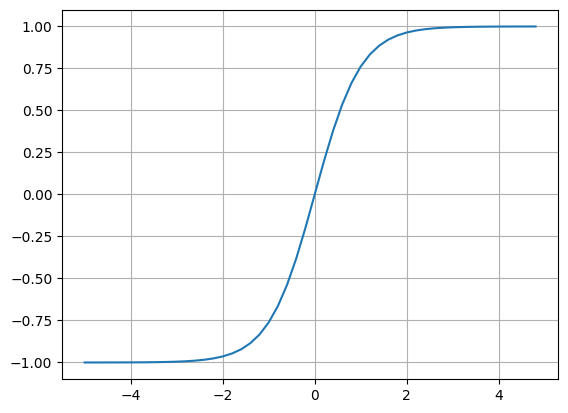

In [14]:
# tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5, 0.2)))
plt.grid()

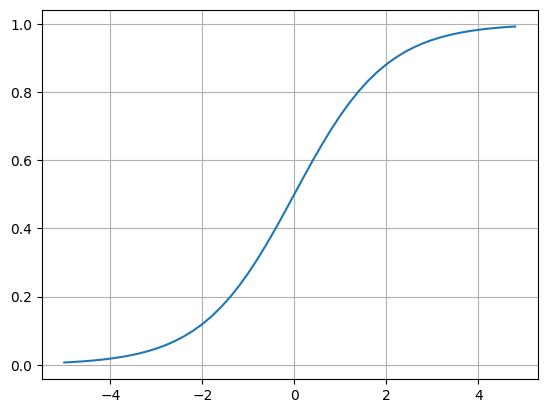

In [13]:
# sigmoid
plt.plot(np.arange(-5,5,0.2), 1 / (1 + np.exp( - np.arange(-5,5, 0.2))))
plt.grid()

In [18]:
# value class with code for tanh function

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 # 0 basically menas no effect, that is it does not affect the final value
        #
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')         #notice the comma in the tuple after self because (1) is an integer not a list
        return out

        
        
# Python i ternally usees the repr function to return this string
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
# Notice that the operator is + and not * remember the operator precedendce tree
# Its like (a * b) + c

In [23]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1' 
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'   #need to implement tanh for the Value class

In [24]:
print(o.data)
print(o._prev)
print(o._op)
print(o.grad)

0.7071067811865476
{value(data = 0.8813735870195432, label = n)}
tanh
0.0


In [25]:
# manual backprop
o.grad = 1.0

In [28]:
n.grad = 0.5

In [29]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [30]:
x2w2.grad = 0.5
x1w1.grad = 0.5

In [32]:
x1.grad = x1w1.grad * w1.data 
w1.grad = x1w1.grad * x1.data
print(x1.grad)
print(w1.grad)

-1.5
1.0


In [33]:
x2.grad = x2w2.grad * w2.data 
w2.grad = x2w2.grad * x2.data
print(x2.grad)
print(w2.grad)

0.5
0.0


In [ ]:
# Doing backprop manuall is troublesome and tiring, so updating the value object witht the backward function 

In [39]:
# value class with code for the _backeard function

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        # default set to empty function because leaf nodes 
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data

        out._backward = _backward
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')         #notice the comma in the tuple after self because (1) is an integer not a list
        
        def _backward():
            self.grad = out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

        
        
# Python i ternally usees the repr function to return this string
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
# Notice that the operator is + and not * remember the operator precedendce tree
# Its like (a * b) + c

In [53]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1' 
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'   #need to implement tanh for the Value class

In [41]:
o.grad = 1.0
o._backward()

In [42]:
print(n.grad)

0.4999999999999999


In [43]:
n._backward()

In [44]:
print(x1w1x2w2.grad)
print(b.grad)

0.4999999999999999
0.4999999999999999


In [45]:
x1w1x2w2._backward()

In [46]:
print(x1w1.grad)
print(x2w2.grad)

0.4999999999999999
0.4999999999999999


In [47]:
x1w1._backward()

In [48]:
x2w2._backward()

In [49]:
print(w1.grad)

0.9999999999999998


In [50]:
print(w2.grad)

0.0


In [ ]:
# Still the aboev approach is somewhat manual

In [54]:
# to do this manually we use the help of topo sort
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)

topo


[value(data = 6.881373587019543, label = b),
 value(data = -3.0, label = w1),
 value(data = 2.0, label = x1),
 value(data = -6.0, label = x1*w1),
 value(data = 1.0, label = w2),
 value(data = 0.0, label = x2),
 value(data = 0.0, label = x2*w2),
 value(data = -6.0, label = x1*w1 + x2*w2),
 value(data = 0.8813735870195432, label = n),
 value(data = 0.7071067811865476, label = o)]

In [58]:
o.grad = 1.0
for node in reversed(topo):
    node._backward()

In [59]:
print(n.grad)
print(x1w1x2w2.grad)
print(b.grad)
print(x1w1.grad)
print(x2w2.grad)
print(w1.grad)
print(w2.grad)

0.4999999999999999
0.4999999999999999
0.4999999999999999
0.4999999999999999
0.4999999999999999
0.9999999999999998
0.0


In [60]:
# Putting this functionality in the Value class

In [67]:
# value class with code for the backward function

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        # default set to empty function because leaf nodes 
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data

        out._backward = _backward
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')         #notice the comma in the tuple after self because (1) is an integer not a list
        
        def _backward():
            self.grad = out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()
        
        
# Python i ternally usees the repr function to return this string
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
# Notice that the operator is + and not * remember the operator precedendce tree
# Its like (a * b) + c

In [68]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1' 
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'   #need to implement tanh for the Value class

In [69]:
o.backward() #only one backward function

In [70]:
print(n.grad)
print(x1w1x2w2.grad)
print(b.grad)
print(x1w1.grad)
print(x2w2.grad)
print(w1.grad)
print(w2.grad)

0.4999999999999999
0.4999999999999999
0.4999999999999999
0.4999999999999999
0.4999999999999999
0.9999999999999998
0.0


In [ ]:
# Done hurray, no not done there is a bug

In [73]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

In [74]:
b.backward()

In [77]:
print(b.grad)
print(a.grad) #value for this is wrong because in the computation graph there is a overlap
# over a's node

1.0
1.0


In [78]:
# another case where ther is a bug is places where the nodes are used more than once
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

In [79]:
print(a.grad)
print(b.grad)

-6.0
-6.0


In [80]:
# Solution to this is to accumulate the gradients, thus change in the Value class
# Using he multivariable rule 

In [ ]:
# value class with code for the backward function without bugs using the multivariable rule

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad #Notice the += ehich was not used earlier to accumulate the gradients

        out._backward = _backward
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()
        


In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

In [81]:
# we could have broken down tanhh function but we didnt as we know the
# derivative for it but we can break it down but we need to implement a few more expressions

In [82]:
# What we can't do now to a value object
# a = Value(-3.2, label = 'a')
# a + 1
# 1 is not of type Value

In [83]:
# value class with code for handling opeartion with non value object

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # notice that we are converting the type of other to 1
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __div__(self, other):
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()
        


In [85]:
a = Value(-2.4, label = 'a')
a + 2 
# works hurray

value(data = -0.3999999999999999, label = )

In [86]:
# Doing the same for the mul operation
# value class with code for handling opeartion with non value object

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __div__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()
        


In [87]:
a = Value(3.4, label = 'a')
a * 4.0
# calls a.__mul__(4.0)

value(data = 13.6, label = )

In [88]:
# But for 4.0 * a wont work
4.0 * a
4.0.__mul__(a)

TypeError: unsupported operand type(s) for *: 'float' and 'Value'

In [ ]:
# Solution to this is rmul which is kinda like a fallback if 4.0 * a fails
# the rmul is called like is a * 4.0 possible

In [91]:
# rmul as a backup for mul
# value class with code for handling opeartion with non value object

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __rmul__(self, other):      #fallback for __mul__
        return self * other          # a.__rmul__(4.0) calls this
    
    def __div__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data / other.data, (self, other), '/')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()
        


In [92]:
a = Value(2.3, label = 'a')
4.0 * a

# a.__rmul__(4.0)

value(data = 9.2, label = )

In [95]:
# Adding the exp method to the Value class
# value class with code for handling exp method

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def __div__(self, other):
        return self * (other**-1)

  
    def exp(self):
        n = self.data
        t = math.exp(n)
        out = Value(t, (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad  #derivative of 
        out._backward = _backward
        
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()

In [96]:
a = Value(2.0, label = 'a')
a.exp()

value(data = 7.38905609893065, label = )

In [97]:
# We want to implement division too which is slightly difficult
a = Value(2.0)
b = Value(3.0)
a / b

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

In [ ]:
# a/b can be represented as
# a * (1/b)
# a * (b**-1)

# Thus instead of implementing a/b we implement for x ** k __pow__() method

In [157]:
# Implementing the __pow__() method in the Value class 

class Value:

    def __init__(self, data, _children = (), _ops = '', label = ''):
        self.data = data;
        self.grad = 0.0 
        self._backward = lambda: None   
        
        self._prev = set(_children)
        self._op = _ops 
        self.label = label

    def __repr__(self):         
        return f"value(data = {self.data}, label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data

        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):    #Notice that the name is truediv and not div
        return self * (other**-1)

    def __pow__(self, other):
        """ this method is for opeartions of the format x ** k basically 
        it helps for the division opeartion as we have broken it down to a * (b ** -1) """
        assert isinstance(other, (int, float))

        out = Value(self.data ** other, (self,), f"**{other}")

        def _backward():
            self.grad += out.grad * (other * self.data ** (other - 1))
            """over here out.grad is the chained part form the parent 
            the other part is just k * x**(k-1)"""

        out._backward = _backward
        
        return out

  
    def exp(self):
        n = self.data
        t = math.exp(n)
        out = Value(t, (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad  #derivative of 
        out._backward = _backward
        
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2 * n) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += out.grad * (1 - t**2)

        out._backward = _backward
        
        return out

    def backward(self):
        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()

In [103]:
# We want to implement division too which is slightly difficult
a = Value(2.0)
b = Value(3.0)
a / b

value(data = 0.6666666666666666, label = )

In [105]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1' 
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o.backward()

In [108]:
print(n.grad)
print(x1w1x2w2.grad)
print(b.grad)
print(x1w1.grad)
print(x2w2.grad)
print(w1.grad)
print(w2.grad)

0.5
0.5
0.5
0.5
0.5
1.0
0.0


In [ ]:
# Now for the above we can break up the implmentation of tanh

In [106]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.8813735870195432, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1' 
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

#----------replacement for tanh---------
e = (2 * n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
#----------
# o = n.tanh(); o.label = 'o'
o.backward()

In [107]:
# If our implementation is correct then the values of 
# gradients should be the same for the above two cases
print(n.grad)
print(x1w1x2w2.grad)
print(b.grad)
print(x1w1.grad)
print(x2w2.grad)
print(w1.grad)
print(w2.grad)

0.5
0.5
0.5
0.5
0.5
1.0
0.0


In [109]:
# They are same so our code is correct

In [ ]:
"""So the reason for the exercise is that the level of the opeartions
does not matter, like I can implement tanh directly too or can break 
it down into atomic opeartions too. As long a swe are able to do the
forward pass and the backward passs it does not matter what the operation is
and how composite it is. So the design""""

In [115]:
# Now how is this done is modern Deep learnign frameworks eg. pytorch API

import torch 
x1 = torch.Tensor([2.0]).double()    ; x1.requires_grad = True
w1 = torch.Tensor([0.0]).double()    ; w1.requires_grad = True
x2 = torch.Tensor([-3.0]).double()    ; x2.requires_grad = True
w2 = torch.Tensor([1.0]).double()    ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()         ;b.requires_grad = True

n = x1*w1 + x2 * w2 + b

o = torch.tanh(n)

print(o.data.item())
o.backward()

print('___')
print('x2', x2.grad.item())
print('x1', x1.grad.item())
print('w2', w2.grad.item())
print('w1', w1.grad.item()) 

0.9991497879990848
___
x2 0.001699701141383847
x1 0.0
w2 -0.005099103424151541
w1 0.003399402282767694


In [117]:
torch.Tensor([[1,2,3],[4,5,6]]).shape #this is what we actually use in production systems

torch.Size([2, 3])

In [113]:
# What we have done is created a tensor and cassting its datatype to double
print(torch.Tensor([2.0]))
print(torch.Tensor([2.0]).double())

tensor([2.])
tensor([2.], dtype=torch.float64)


In [114]:
# because the nodes are leaf nodes pytorch assumens that they dont 
# require gradients, so we need to explicitly specify that.

In [118]:
# We can perform aritmatic just like mocrograd

In [119]:
torch.Tensor([[1,2,3],[4,5,6]]).item()
# Item is only for the scalars, ehat it does is it strips out the tensors 
# and return only the scalar

RuntimeError: a Tensor with 6 elements cannot be converted to Scalar

In [120]:
# o is a tensor obect and it has a backward function ust like micrograd

In [121]:
# Every tensor has a grad attribute which is itself is a tensor

In [122]:
# so
x2.grad

tensor([0.0017], dtype=torch.float64)

In [125]:
# to convert this to scalar
x2.grad.item()

0.001699701141383847

In [ ]:
# Thus we can conclude that micrograd is a specal case of torch 
# which has all tensors as scalars, but the thing tensors is that 
# everything is significantly more efficient because of these tensor objects
# and because we can perform these opeartions in parallel on all of 
# these tensors.


In [126]:
# Starting with building a neural network from scratch

In [127]:
# we will try to match the pytorches NN api module 

In [130]:
import random

In [131]:
# Declearing init and  understanding when is the __call__() function called
class Neuron:

    def __init__(self, nin): #nin - num f inputs that come to theh neuron
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        return "A call to __call__ function"

x = [1,2]
n = Neuron(2)
n(x)      # <------- this calls the __call__ function

'A call to __call__ function'

In [151]:
class Neuron:

    def __init__(self, nin): #nin - num f inputs that come to theh neuron
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """We want to return the w.x + b"""
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

x = [1,2]
n = Neuron(2)
n(x)

value(data = 0.9668415956363792, label = )

In [152]:
# Making the class Layer to make a kayer of neurons
class Neuron:

    def __init__(self, nin): #nin - num f inputs that come to theh neuron
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """We want to return the w.x + b"""
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out


class Layer:
    def __init__(self, nin, nout): #nin - num of inputs or the number of neuron is 
        # the previous layer - num of neuron in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

x = [1,2]
n = Layer(2, 3)   #3 neurons with 2 outputs
n(x)

[value(data = -0.7841648030520512, label = ),
 value(data = 0.4927688948371145, label = ),
 value(data = 0.1876084529496091, label = )]

In [153]:
#Finally defineing a MLP hint: the layers ust feed into each other sequentially

class MLP:

    def __init__(self, nin, nouts):   # nouts and not nout, 
        # its a list of nouts done to know the number of neuron in each layer

        sz = [nin] + nouts
        self.layers  = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        # here x is updated itteratively
        return x


x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

value(data = 0.8354722716662634, label = )

In [158]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

ypred = [n(x) for x in xs]
ypred

# we want to better the predictions

[value(data = 0.8354722716662634, label = ),
 value(data = 0.851708817036619, label = ),
 value(data = 0.5007604044179884, label = ),
 value(data = 0.8194690171739821, label = )]

In [159]:
# For making the predictions we first find that what is the loss on 
# the current network

losses = [(yout - ygt)**2 / 2 for ygt, yout in zip(ys, ypred)]
losses

[value(data = 0.013534686695329923, label = ),
 value(data = 1.7144127715455777, label = ),
 value(data = 1.1261408957344223, label = ),
 value(data = 0.01629571788006398, label = )]

In [160]:
loss = sum(losses)     #added the method __radd__() for int + Value case
loss
# We want to reduce the loss

value(data = 2.8703840718553937, label = )

In [161]:
loss.backward()

In [163]:
print(n.layers[0].neurons[0].w[0])
print(n.layers[0].neurons[0].w[0].grad)

value(data = 0.8482617184080972, label = )
-0.0021398729724870003


In [ ]:
# We have the gradients for every single one of the neurons and their parameters

In [ ]:
# Now we need to update them so to do it in a non manual way 
# we need to create a list of the paramenters for convinience

In [219]:
# Updating class Neuron, class Layer and class MLP to include the paramenter
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """We want to return the w.x + b"""
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        """This is the new method"""
        return self.w + [self.b] #we are concatening the w list and 
        # creting a list of b to concat


class Layer:
    def __init__(self, nin, nout): 
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        """This is the new method"""
        # params = []
        # for neuron in self.neurons:
        #     params.extend(neuron.parameters())
        # return params

        #shorthand for the above code
        return [p for neuron in self.neurons for p in neuron.parameters()]
        
class MLP:

    def __init__(self, nin, nouts): 
        sz = [nin] + nouts
        self.layers  = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        """This is the new method"""
        return [p for layer in self.layers for p in layer.parameters()]



In [220]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

value(data = 0.6996924181516849, label = )

In [221]:
n.parameters()

[value(data = 0.6147518564323762, label = ),
 value(data = 0.9044111589240256, label = ),
 value(data = -0.8850773550033395, label = ),
 value(data = 0.49822666369580304, label = ),
 value(data = -0.06152572535894474, label = ),
 value(data = 0.6424842406081193, label = ),
 value(data = 0.2623449399570583, label = ),
 value(data = -0.28375100912518847, label = ),
 value(data = 0.5155770906644503, label = ),
 value(data = -0.22959687187580924, label = ),
 value(data = -0.4865125992900625, label = ),
 value(data = -0.23627827627845877, label = ),
 value(data = 0.45971000179321986, label = ),
 value(data = -0.8258345069661737, label = ),
 value(data = -0.3806963010214952, label = ),
 value(data = -0.79626743749699, label = ),
 value(data = -0.5847328190152354, label = ),
 value(data = -0.0348679554445912, label = ),
 value(data = -0.8330584986936675, label = ),
 value(data = -0.39039833297398197, label = ),
 value(data = 0.2040101825849825, label = ),
 value(data = 0.9683790520810716, lab

In [222]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

ypred = [n(x) for x in xs]
ypred

# we want to better the predictions

[value(data = 0.6996924181516849, label = ),
 value(data = -0.6605260244010368, label = ),
 value(data = 0.8129494866321239, label = ),
 value(data = 0.6683047217340816, label = )]

In [223]:
losses = [(yout - ygt)**2 / 2 for ygt, yout in zip(ys, ypred)]
losses

[value(data = 0.04509232185779123, label = ),
 value(data = 0.05762129005448273, label = ),
 value(data = 1.6433929205398408, label = ),
 value(data = 0.05501087881195251, label = )]

In [224]:
loss = sum(losses)
loss

value(data = 1.8011174112640673, label = )

In [187]:
loss.backward()

In [189]:
print(n.layers[0].neurons[0].w[0].grad)
print(n.layers[0].neurons[0].w[0].data)

-0.10448148786147037
-0.8750059578596197


In [190]:
for p in n.parameters():
    p.data = p.data - 0.01 * p.grad

In [191]:
print(n.layers[0].neurons[0].w[0].data) # notice the change

-0.8739611429810049


In [192]:
# calculating the loss again
ypred = [n(x) for x in xs]
ypred
losses = [(yout - ygt)**2 / 2 for ygt, yout in zip(ys, ypred)]
losses
loss = sum(losses)
loss

value(data = 2.5819471573865393, label = )

In [193]:
# Notice that the loss has decreased thus 
# our predictions have moved close to the target

In [ ]:
# So if we continue doing this again and agan then the predictions we make 
# improve and then there

In [200]:
# Making the training process
epochs = 20
for i in range(epochs):
    #forward pass
    ypred = [n(x) for x in xs]
    losses = [(yout - ygt)**2 / 2 for ygt, yout in zip(ys, ypred)]
    loss = sum(losses)

    # backward pass
    loss.backward()

    # paramenter update
    for p in n.parameters():
        p.data = p.data - 0.05 * p.grad
        
    print(f"The loss in the {i + 1} th itteration is: ", loss)
    

The loss in the 1 th itteration is:  value(data = 2.9235505289188333, label = )
The loss in the 2 th itteration is:  value(data = 1.7769894564341786, label = )
The loss in the 3 th itteration is:  value(data = 1.0497103385569966, label = )
The loss in the 4 th itteration is:  value(data = 1.0908432019014782, label = )
The loss in the 5 th itteration is:  value(data = 0.3592868152566554, label = )
The loss in the 6 th itteration is:  value(data = 0.05286334594079025, label = )
The loss in the 7 th itteration is:  value(data = 0.06905098745636698, label = )
The loss in the 8 th itteration is:  value(data = 0.0807862026978684, label = )
The loss in the 9 th itteration is:  value(data = 0.03266082266738141, label = )
The loss in the 10 th itteration is:  value(data = 0.013717878503543546, label = )
The loss in the 11 th itteration is:  value(data = 0.008628723654881773, label = )
The loss in the 12 th itteration is:  value(data = 0.007125874014716035, label = )
The loss in the 13 th ittera

In [202]:
ypred = [n(x) for x in xs]
ypred

[value(data = 0.9999971771556462, label = ),
 value(data = -0.9982530022520791, label = ),
 value(data = -0.9310358721141664, label = ),
 value(data = 0.9999972375697439, label = )]

In [ ]:
# IMPORTANT NOTE:
# There is a very common bug in the above implementation, we didn't 
# make the gradients zero after updating, remember that we add the 
# gradients according to the multivariable rule, but that accumulates the
# gradients too and we need to make them 0 every time before calling loss.backward()
# for the next epocs.


In [225]:
# making the gradients 0 before the loss.backward()
epochs = 60
for i in range(epochs):
    #forward pass
    ypred = [n(x) for x in xs]
    losses = [(yout - ygt)**2 / 2 for ygt, yout in zip(ys, ypred)]
    loss = sum(losses)
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    
    loss.backward()

    # paramenter update
    for p in n.parameters():
        p.data = p.data - 0.05 * p.grad
        
    print(f"The loss in the {i + 1} th itteration is: ", loss)
    

The loss in the 1 th itteration is:  value(data = 1.8011174112640673, label = )
The loss in the 2 th itteration is:  value(data = 1.7520969211791455, label = )
The loss in the 3 th itteration is:  value(data = 1.6908132855370477, label = )
The loss in the 4 th itteration is:  value(data = 1.6109856626642607, label = )
The loss in the 5 th itteration is:  value(data = 1.5059233856188212, label = )
The loss in the 6 th itteration is:  value(data = 1.371212697415804, label = )
The loss in the 7 th itteration is:  value(data = 1.210957146996814, label = )
The loss in the 8 th itteration is:  value(data = 1.0410935888844484, label = )
The loss in the 9 th itteration is:  value(data = 0.8789894712223966, label = )
The loss in the 10 th itteration is:  value(data = 0.7332321148327666, label = )
The loss in the 11 th itteration is:  value(data = 0.6075943015412596, label = )
The loss in the 12 th itteration is:  value(data = 0.5033274553742825, label = )
The loss in the 13 th itteration is:  v

In [226]:
ypred = [n(x) for x in xs]
ypred

[value(data = 0.9113856799052638, label = ),
 value(data = -0.9236600519218059, label = ),
 value(data = -0.8888810936547019, label = ),
 value(data = 0.9152203872193402, label = )]

In [227]:
# Observation that we got a much more slower descent after making the zero_grad change

In [ ]:
# We had bugs earlier but the code actually works, so working with it is tricky